### Семинар по решающим деревьям

На этом семинаре вы доработаете алгоритм обучения решающего дерева для задачи регрессии и сравните полученную реализацию с моделью из sklearn. Кроме того, вы исследуете эффект ансамблирования, то есть усреднения предсказаний по нескольким решающим деревьям (на примере бэггинга).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

Мы будем работать с датасетом Бостон - это стандартный набор данных, в которм нужно предсказать стоимость жилья по различным характеристикам. Загрузка данных:

In [2]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Выделим обучающую выборку:

In [17]:
X = boston["data"]
y = boston["target"]

In [18]:
X.shape

(506, 13)

### Задание 1. 
Разделите выборку на обучение и контроль в пропорции 7:3.

In [21]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=0.3,random_state=1)




In [25]:
X_train.shape

(354, 13)

In [26]:
X_test.shape

(152, 13)

### Задание 2.
Откройте файл "decision_tree_exercise.py". В нем реализован алгоритм обучения и предсказания для решающего дерева. Вам надо дописать два фрагмента кода, которые помечены TO DO:
* критерий останова
* функцию предсказания

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt = DecisionTreeRegressor(min_samples_leaf=5)

In [38]:
np.sum(X[:, 5] <= 6)

173

In [ ]:
dt.fit(X_train, y_train)

### Задание 3. 
Обучите свое решающее дерево и модель из sklearn на обучающей выборке и выведите MSE на тестовой выборке. Выведите время работы обоих алгоритмов.

In [40]:
from decision_tree_exercise import MyDecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [53]:
%%time
dt = MyDecisionTree(min_leaf_size=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

12.0297275509
CPU times: user 1.67 s, sys: 11.4 ms, total: 1.68 s
Wall time: 1.69 s


In [59]:
%%time
dt = DecisionTreeRegressor(min_samples_leaf=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_squared_error(y_test, y_pred))

13.7702266082
CPU times: user 4.24 ms, sys: 1.64 ms, total: 5.88 ms
Wall time: 4.07 ms


Какое дерево показывает лучше качество? Какое быстрее работает? Как вы думаете, почему?

### Задание 4 (необязательное)
Разберитесь с тем, как работает функция find_best_split из модуля decision_tree_exercise. Ваша задача: вместо того, чтобы находить лучший признак и порог для разделения, нужно составить таблицу размера число признаков на число объектов (==число порогов), элементы которой - значение критерия качества при таком разделении _всей обучающей выборки_. Предполагается, что пороги отсортированы по возрастанию.

Итого, что нужно сделать:
* отсортировать признак (найти нужную строку в цикле)
* вместо поиска минимума записывать значения критерия в матрицу.

В итоге вам нужно нарисовать график изменения критерия при движении порога. Всего получится столько линий на графике, сколько всего признаков.

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
errs = []
X = X_tr
y = y_tr





Какое разделение (по какому признаку и порогу) выберет алгоритм на первом шаге?

### Задание 5. 
Реализуйте бэггинг над решающими деревьями.

Для этого:
* Запустите цикл по числу деревьев. При обучении каждого дерева вы генерируете множество индексов с повторениями, выделяете соответствующую выборку из обучения и на ней обучаете дерево. Далее делаете предсказание этого дерева на тестовой выборке, и __сохраняете вектор предсказаний в список pred.__

In [60]:
pred = []
for i in range(10):
    idxs = np.random.randint(0, len(X_train), len(X_train))
    X_train_bag = X_train[idxs]
    y_train_bag = y_train[idxs]
    dt = MyDecisionTree()
    dt.fit(X_train_bag, y_train_bag)
    y_pred = dt.predict(X_test)
    pred.append(y_pred)
pred = np.array(pred)

In [64]:
y_pred_bag = pred.mean(axis=0)

In [65]:
mean_squared_error(y_test, y_pred_bag)

8.9473046052631577

Теперь надо для каждого k посчитать качество при усреднении предсказаний по первым k деревьям.

In [67]:
errs = []
for i in range(10):
    y_pred_bag = pred[:i+1].mean(axis=0)
    err = mean_squared_error(y_test, y_pred_bag)
    errs.append(err)

Text(0,0.5,'Качество')

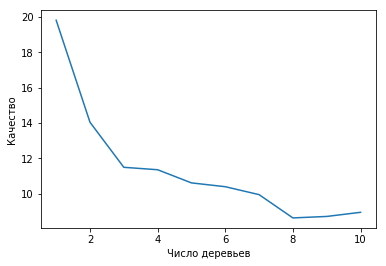

In [71]:
plt.plot(np.arange(1, 11), errs)
plt.xlabel("Число деревьев")
plt.ylabel("Качество")

Наконец, постройте график MSE в зависимости от числа деревьев.

График должен приблизительно идти вниз с ростом числа деревьев и в конце выйти на постоянное качество.